In [32]:
from __future__ import annotations

import pickle

from IPython.core.magics.execution import TimeitResult


def load_benchmark(filename: str) -> TimeitResult:
    with open(filename, "rb") as f:
        return pickle.load(f)

benchmarks: dict[int | str, TimeitResult] = {}
benchmarks["all"] = load_benchmark(f"timing_all.pickle")
for i in range(12):
    benchmarks[i] = load_benchmark(f"timing_c0-{i}.pickle")

In [42]:
import pandas as pd

df = pd.DataFrame(
    {
        k + 1: v.all_runs
        for k, v in benchmarks.items()
        if isinstance(k, int)
        # if k % 2 == 0
        # if k < 6
    }
)


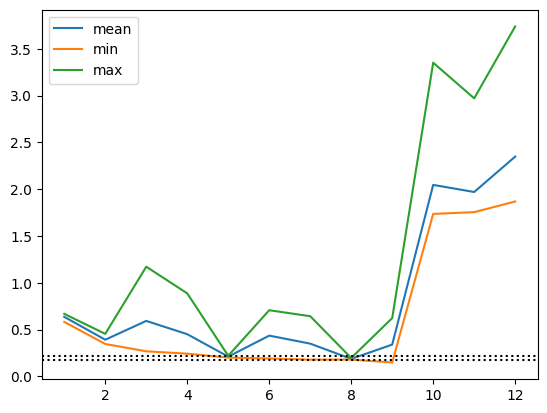

In [43]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
df.mean().plot(label="mean", ax=ax)
df.min().plot(label="min", ax=ax)
df.max().plot(label="max", ax=ax)
ax.axhline(min(benchmarks["all"].all_runs), linestyle="dotted", c="black")
ax.axhline(max(benchmarks["all"].all_runs), linestyle="dotted", c="black")
ax.legend()
plt.show()